[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/IPML/blob/master/tutorial_notebooks/t10_solution.ipynb)

# Decision Trees

## Preliminaries

In [41]:
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score

from t10_helper import *

## Visualizing Decisions Trees in one dimension

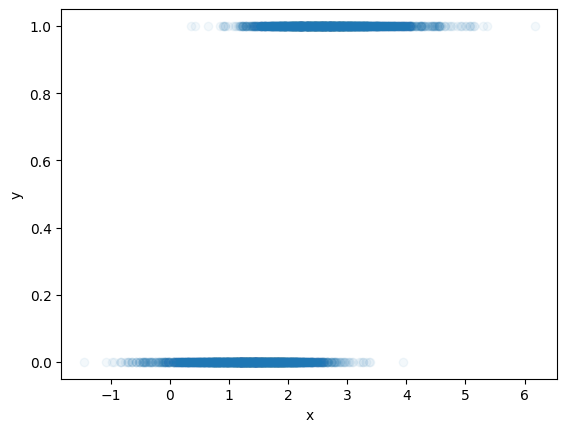

In [42]:
x, y, _ = generate1D_data() # generate binary classification problem with one feature

### Shallow tree

In [43]:
model_tree = DecisionTreeClassifier(max_depth=1).fit(x, y)

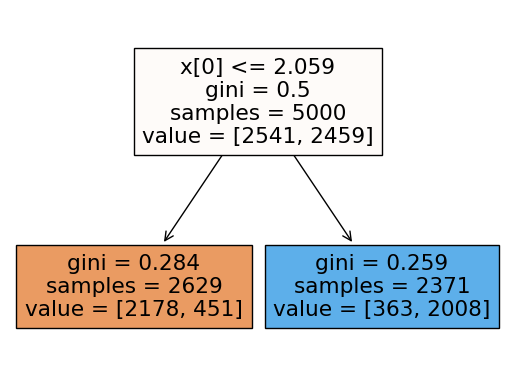

In [44]:
plot_tree(model_tree, filled=True);

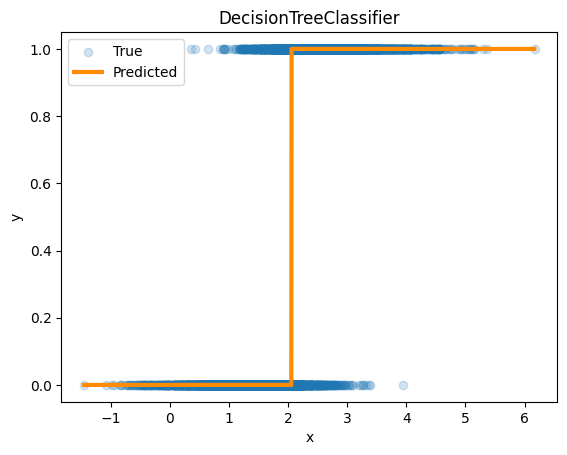

In [45]:
predict_plot(model_tree, x, y)

### Deeper tree

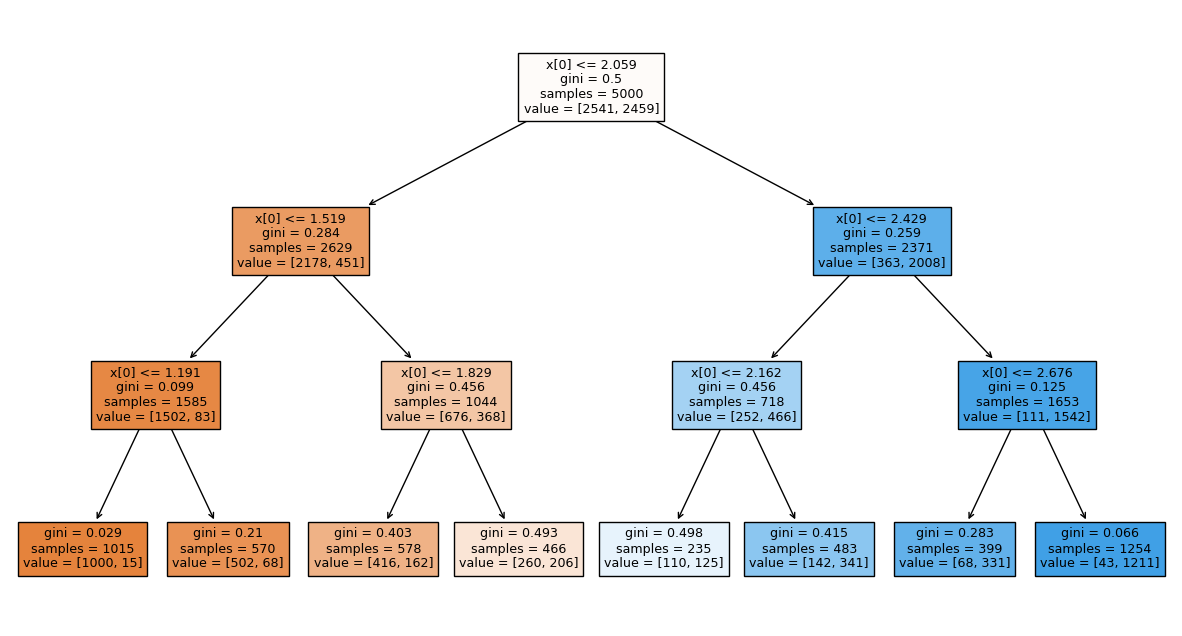

In [46]:
model_tree = DecisionTreeClassifier(max_depth=3).fit(x, y)

plt.figure(figsize=(15,8))
plot_tree(model_tree, filled=True)
plt.show()

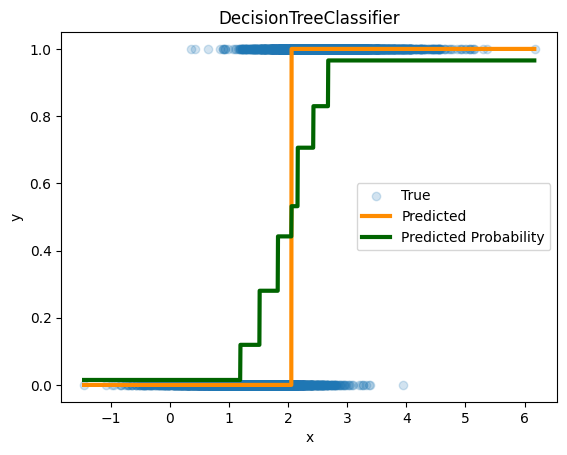

In [47]:
predict_plot(model_tree, x, y, proba=True)

### Comparing to Logistic Regression

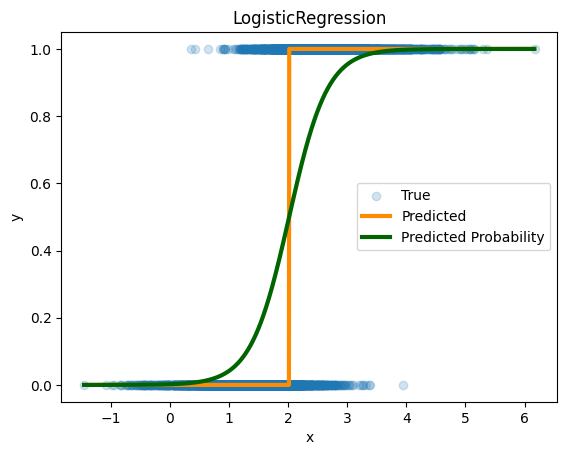

In [48]:
model_logistic = LogisticRegression().fit(x, y)

predict_plot(model_logistic, x, y, proba=True)

## Visualizing Decisions Trees in two dimensions

### Shallow tree

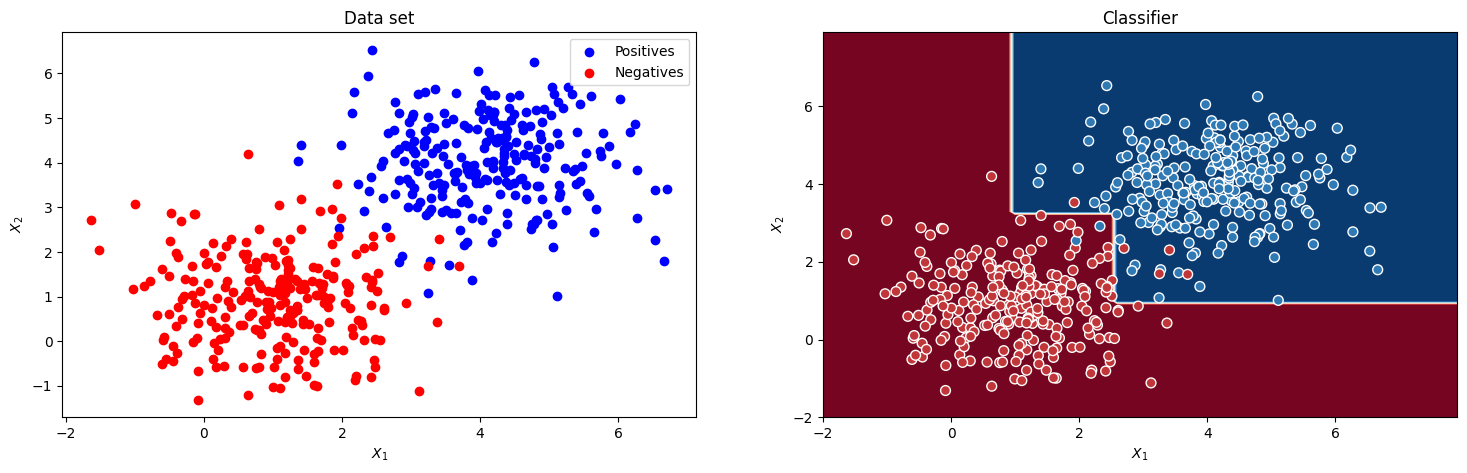

In [49]:
plot_class_boundary(*generate2D_data(), DecisionTreeClassifier(max_depth=3));

### Fully grown tree

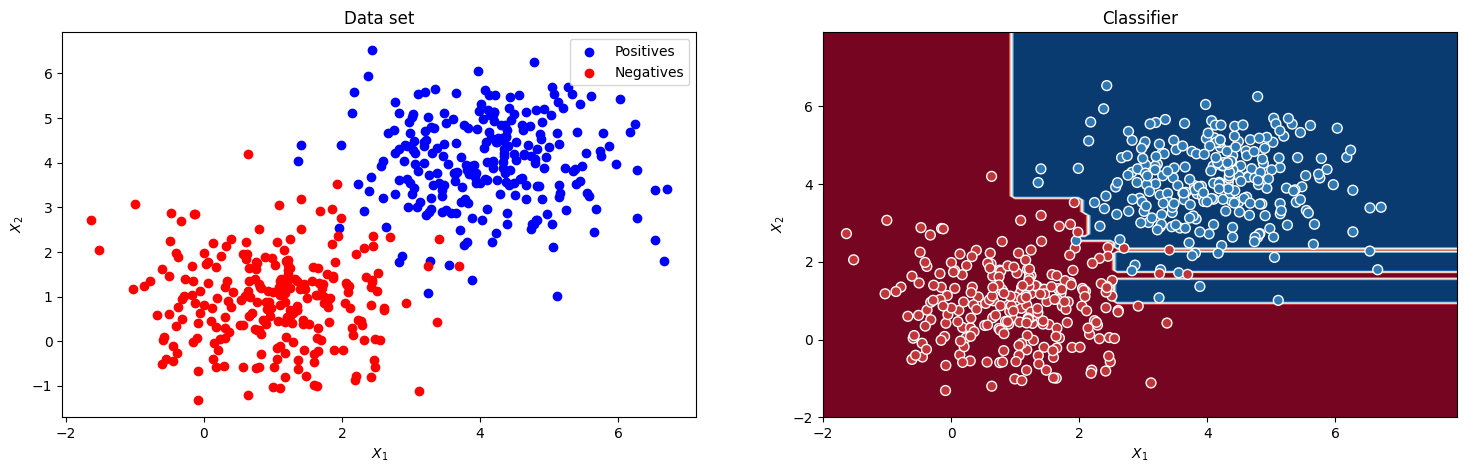

In [50]:
plot_class_boundary(*generate2D_data(), DecisionTreeClassifier());

## Applying decision trees to our two standard data sets for regression and classification 

The structure of all below codes is copied from earlier notebooks on regression and classification, which provide details on the sklearn implementation.

### Regression Problem: California Housing

In [51]:
# Retrieve data from sklearn library as Pandas dataframe
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)  
# Create default variables names X, y for further analysis
# We use the suffix _reg to highlight that this data facilitates regression
X_reg = california_housing.data
y_reg = california_housing.target

#### Eyeballing the data

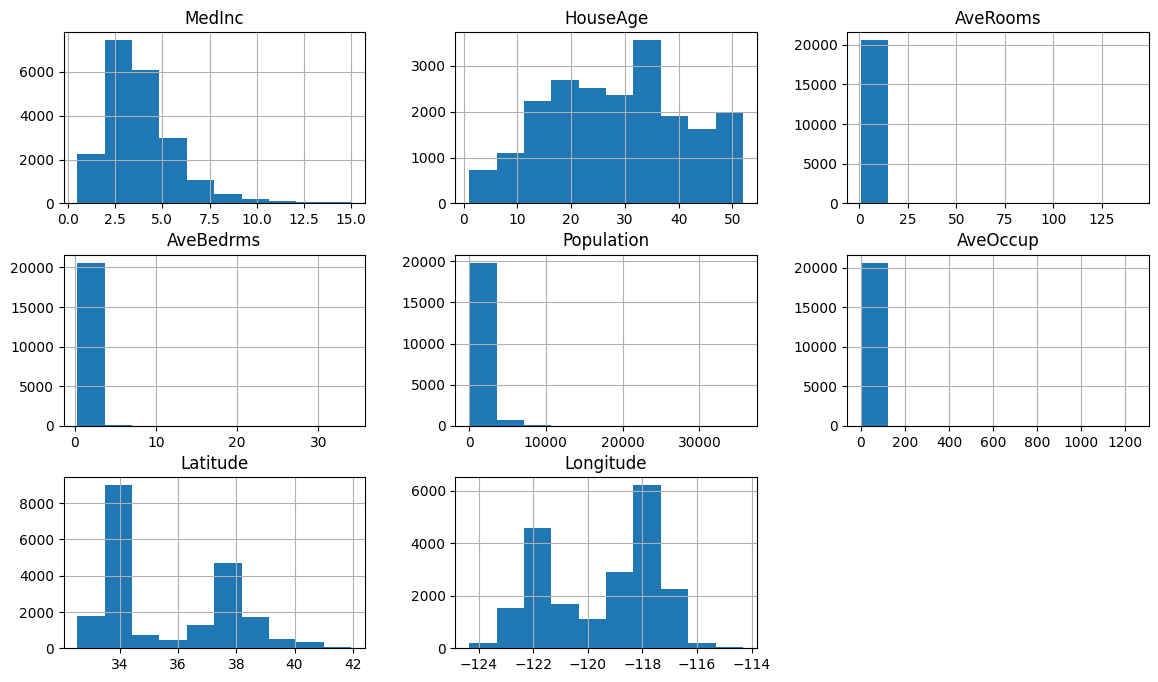

In [66]:
X_reg.hist(figsize=(14, 8));

#### Training Decision Tree using Sci-kit Learn

In [53]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42)

y_reg_pred = DecisionTreeRegressor(random_state=42, max_depth=20).fit(
    X_reg_train, y_reg_train).predict(X_reg_test)

#### Linear Regression as benchmark

In [54]:
y_reg_pred_linear = LinearRegression().fit(
    X_reg_train, y_reg_train).predict(X_reg_test)

#### Comparing performance

In [69]:
print(f'Decision Tree MSE:\t{mean_squared_error(y_reg_test, y_reg_pred):.4f}')
print(f'Regression MSE:\t\t{mean_squared_error(y_reg_test, y_reg_pred_linear):.4f}')

Decision Tree MSE:	0.5350
Regression MSE:		0.5306


### Classification Problem: Home Equity Mortgage Data

The HMEQ data set facilitates classification. Given that this data set exhibits some missing values and categorical features, we need to perform a bit of data preparation before we can create our standard data structures `X, y` for further analysis

In [56]:
# Download the data from the web
url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/hmeq.csv'
df = pd.read_csv(url)  # standard pandas function to load tabular data in CSV format

# Missing value handling
for col in df.columns:  # loop through all the columns (i.e., features)
    if df[col].dtype == 'O':  # decide on the imputation strategy based on the data type
        df[col].fillna(df[col].mode()[0], inplace=True)  # mode replacement for categories
    else:
        df[col].fillna(df[col].median(), inplace=True)  # mean replacement for all other features 

# Dummy coding of the (two) categorical variables
df = pd.get_dummies(data=df, drop_first=True)

# Create default variables names X, y for further analysis
# We use the suffix _cls to highlight that this data facilitates regression
X_cls = df.copy()
y_cls = X_cls.pop('BAD')

#### Eyeballing the data

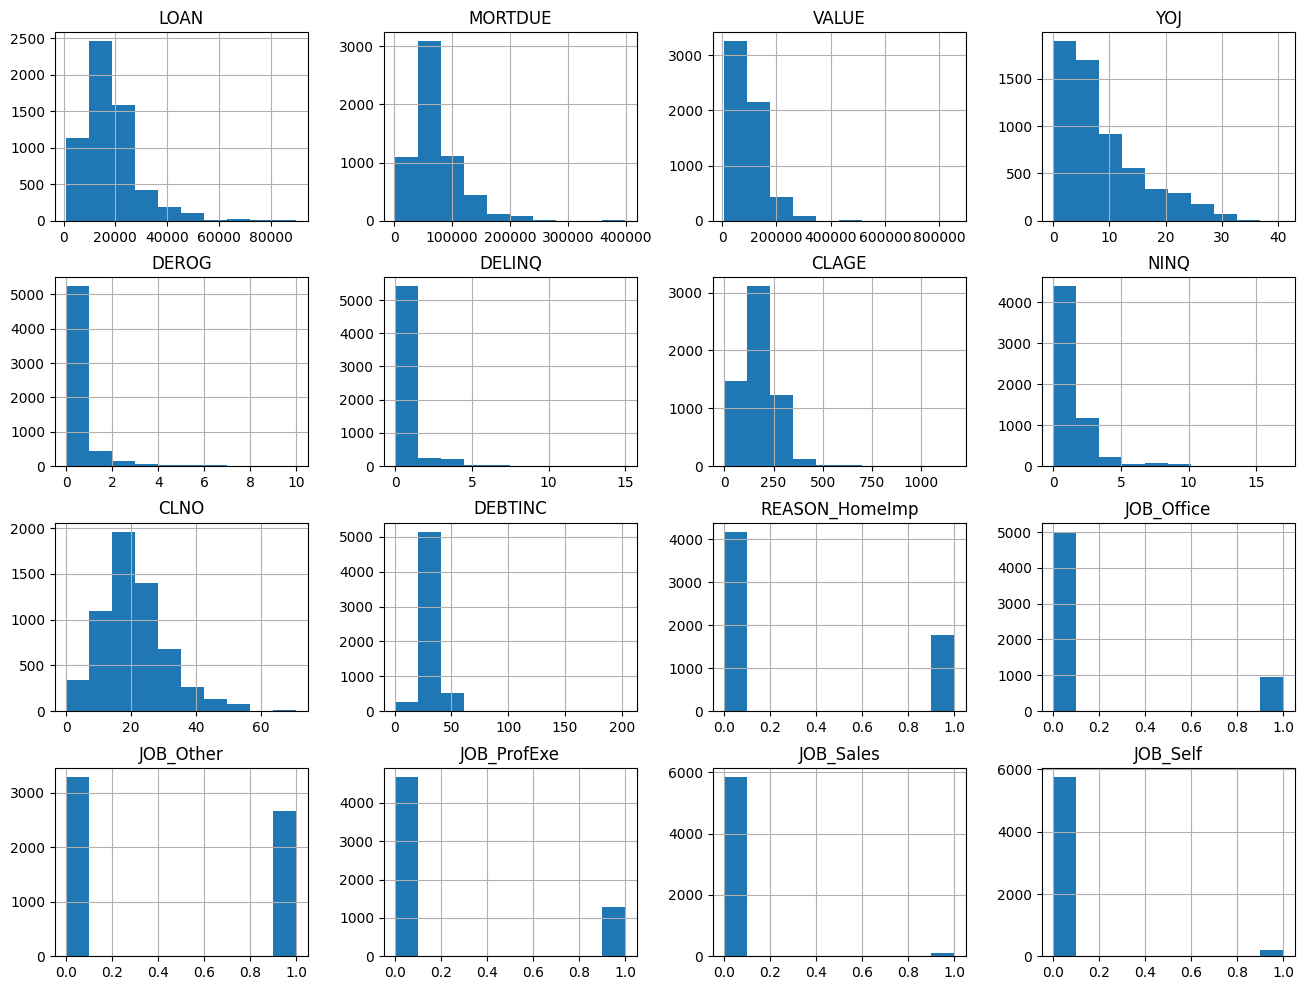

In [67]:
X_cls.hist(figsize=(16, 12));

#### Training Decision Tree using Sci-kit Learn

In [58]:
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(
    X_cls, y_cls, test_size=0.3, random_state=42)

y_cls_pred = DecisionTreeClassifier(random_state=42).fit(
    X_cls_train, y_cls_train).predict(X_cls_test)

#### Logistic Regression as benchmark

In [59]:
y_cls_pred_linear = LogisticRegression().fit(
    X_cls_train, y_cls_train).predict(X_cls_test)

#### Comparing performance

In [71]:
print(f'Decision Tree AUC ROC:\t{roc_auc_score(y_cls_test, y_cls_pred):.4f}')
print(f'Logit AUC ROC:\t\t{roc_auc_score(y_cls_test, y_cls_pred_linear):.4f}')

Decision Tree AUC ROC:	0.7949
Logit AUC ROC:		0.5089
